In [3]:
!pip install scikit-learn
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
image_path = "../output_video/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

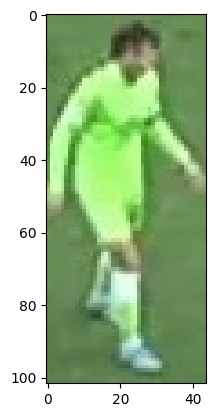

In [5]:
plt.imshow(image)
plt.show()

# Take the top-half of the image


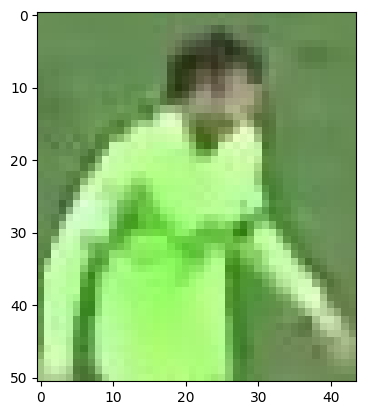

In [6]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into 2 clusters


image_2d [[104 142  85]
 [104 142  85]
 [103 142  85]
 ...
 [108 137  83]
 [107 136  82]
 [107 137  83]]


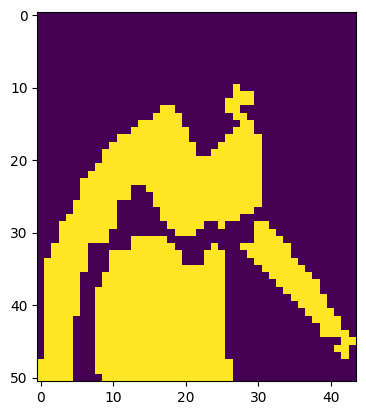

In [7]:
# Reshape the image into 2d array - Format [[r,g,b], [r,g,b], ... [r,g,b]]
image_2d = top_half_image.reshape(-1, 3)

# perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the label into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [8]:
corner_clusters = [clustered_image[0, 0],
                  clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [9]:
player_cluster = 1 - non_player_cluster

In [10]:
kmeans.cluster_centers_[player_cluster]

array([176.17835178, 242.48462485, 140.16113161])